<a href="https://colab.research.google.com/github/enockmugisha1/UNHCR/blob/main/PCA_Formative_2_Enock_Mugisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

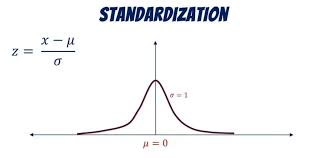


In [5]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/enockmugisha1/UNHCR/refs/heads/main/WHO-COVID-19-global-daily-data.csv')

# Drop non-numerical columns and any rows with missing values
data = data.select_dtypes(include=['float64', 'int64'])
data = data.dropna()

# Extract features as numpy array
X = data.values

# Calculate mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Standardize the data: (X - mean) / std
standardized_data = (X - mean) / std

# Display the first few rows of standardized data
standardized_data[:5]

array([[-0.08833778, -0.26333484, -0.18868158, -0.31768567],
       [-0.08833778, -0.26333484, -0.18868158, -0.31768567],
       [-0.08833778, -0.26333484, -0.18868158, -0.31768567],
       [-0.08833778, -0.26333484, -0.18868158, -0.31768567],
       [-0.08833778, -0.26333484, -0.18868158, -0.31768567]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [6]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

array([[1.0000065 , 0.15368934, 0.26836824, 0.14873239],
       [0.15368934, 1.0000065 , 0.17785319, 0.62286538],
       [0.26836824, 0.17785319, 1.0000065 , 0.33620782],
       [0.14873239, 0.62286538, 0.33620782, 1.0000065 ]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [7]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([1.89893279, 1.01589447, 0.73497984, 0.35021889]),
 array([[ 0.32977593,  0.7087511 ,  0.61805175,  0.08325711],
        [ 0.56787066, -0.42714044,  0.27411733, -0.64802288],
        [ 0.43991467,  0.46276651, -0.73439698, -0.23018106],
        [ 0.61257312, -0.31791521, -0.05943743,  0.72121514]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [8]:
# Step 5: Sort Principal Components

# Sort eigenvalues in descending order and get their indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvectors according to sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculate and display explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained variance ratio by principal components:")
for i, var in enumerate(explained_variance_ratio[:5]):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")

sorted_eigenvectors

Explained variance ratio by principal components:
PC1: 0.4747 (0.4747 cumulative)
PC2: 0.2540 (0.7287 cumulative)
PC3: 0.1837 (0.9124 cumulative)
PC4: 0.0876 (1.0000 cumulative)


array([[ 0.32977593,  0.7087511 ,  0.61805175,  0.08325711],
       [ 0.56787066, -0.42714044,  0.27411733, -0.64802288],
       [ 0.43991467,  0.46276651, -0.73439698, -0.23018106],
       [ 0.61257312, -0.31791521, -0.05943743,  0.72121514]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [9]:
# Step 6: Project Data onto Principal Components

num_components = 2 # Decide on the number of principal components to keep
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])  # Project data onto the principal components
reduced_data[:5]


array([[-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [10]:
# Step 7: Output the Reduced Data
print(f'Reducing the Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reducing the Data Shape: (153916, 2)


array([[-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305],
       [-0.4562813 ,  0.06355305]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

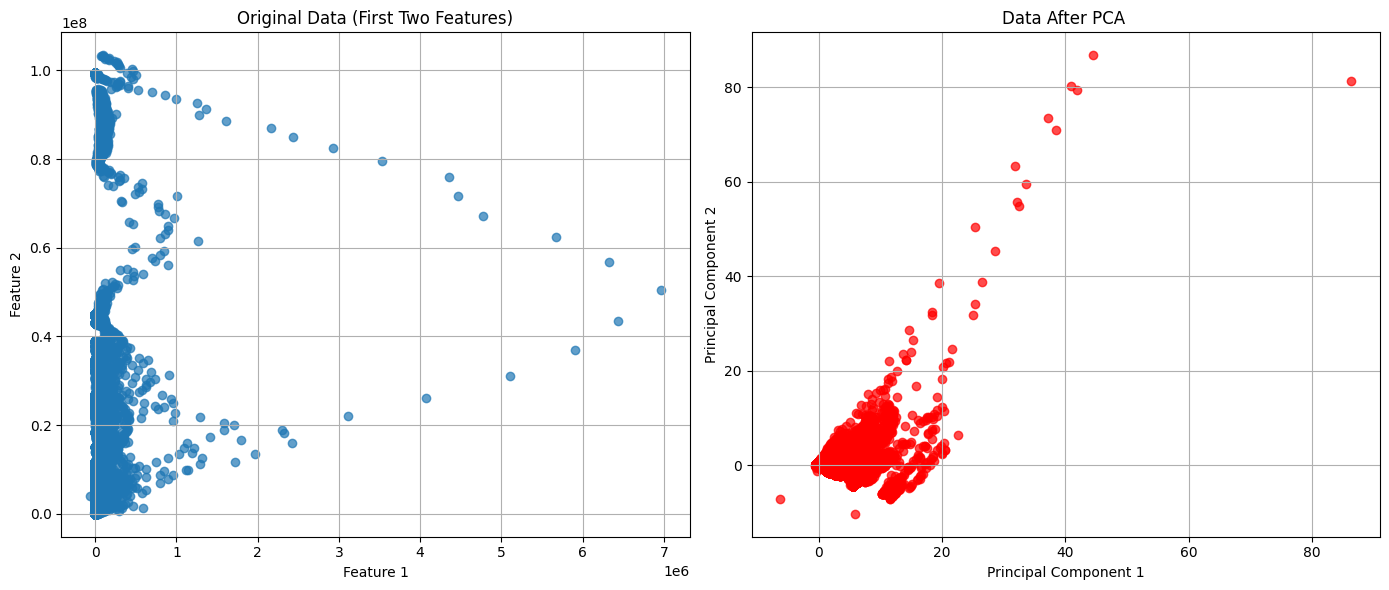

In [11]:
# Step 8: Visualize Before and After PCA
plt.figure(figsize=(14, 6))

# Plot original data (first two features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, c='r')
plt.title('Data After PCA ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

